In [1]:
# 불필요한 경고 출력을 방지
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('data/weatherAUS.csv')
print(df.shape)

(145460, 23)


<Axes: xlabel='RainTomorrow', ylabel='count'>

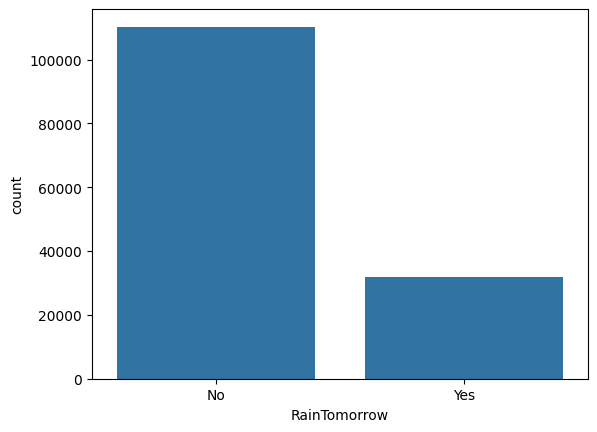

In [4]:
cat_cols = df.select_dtypes(exclude=np.number).columns
sns.countplot(x="RainTomorrow", data=df)

In [5]:
num_cols = df.select_dtypes(include=np.number).columns
num_cols

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [6]:
temp_df = df[num_cols]
temp_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


In [7]:
# Yes/No 값을 0, 1로 변경하기
temp_df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1}) #.astype(dtype='int')
temp_df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1}) #.astype(dtype='int')

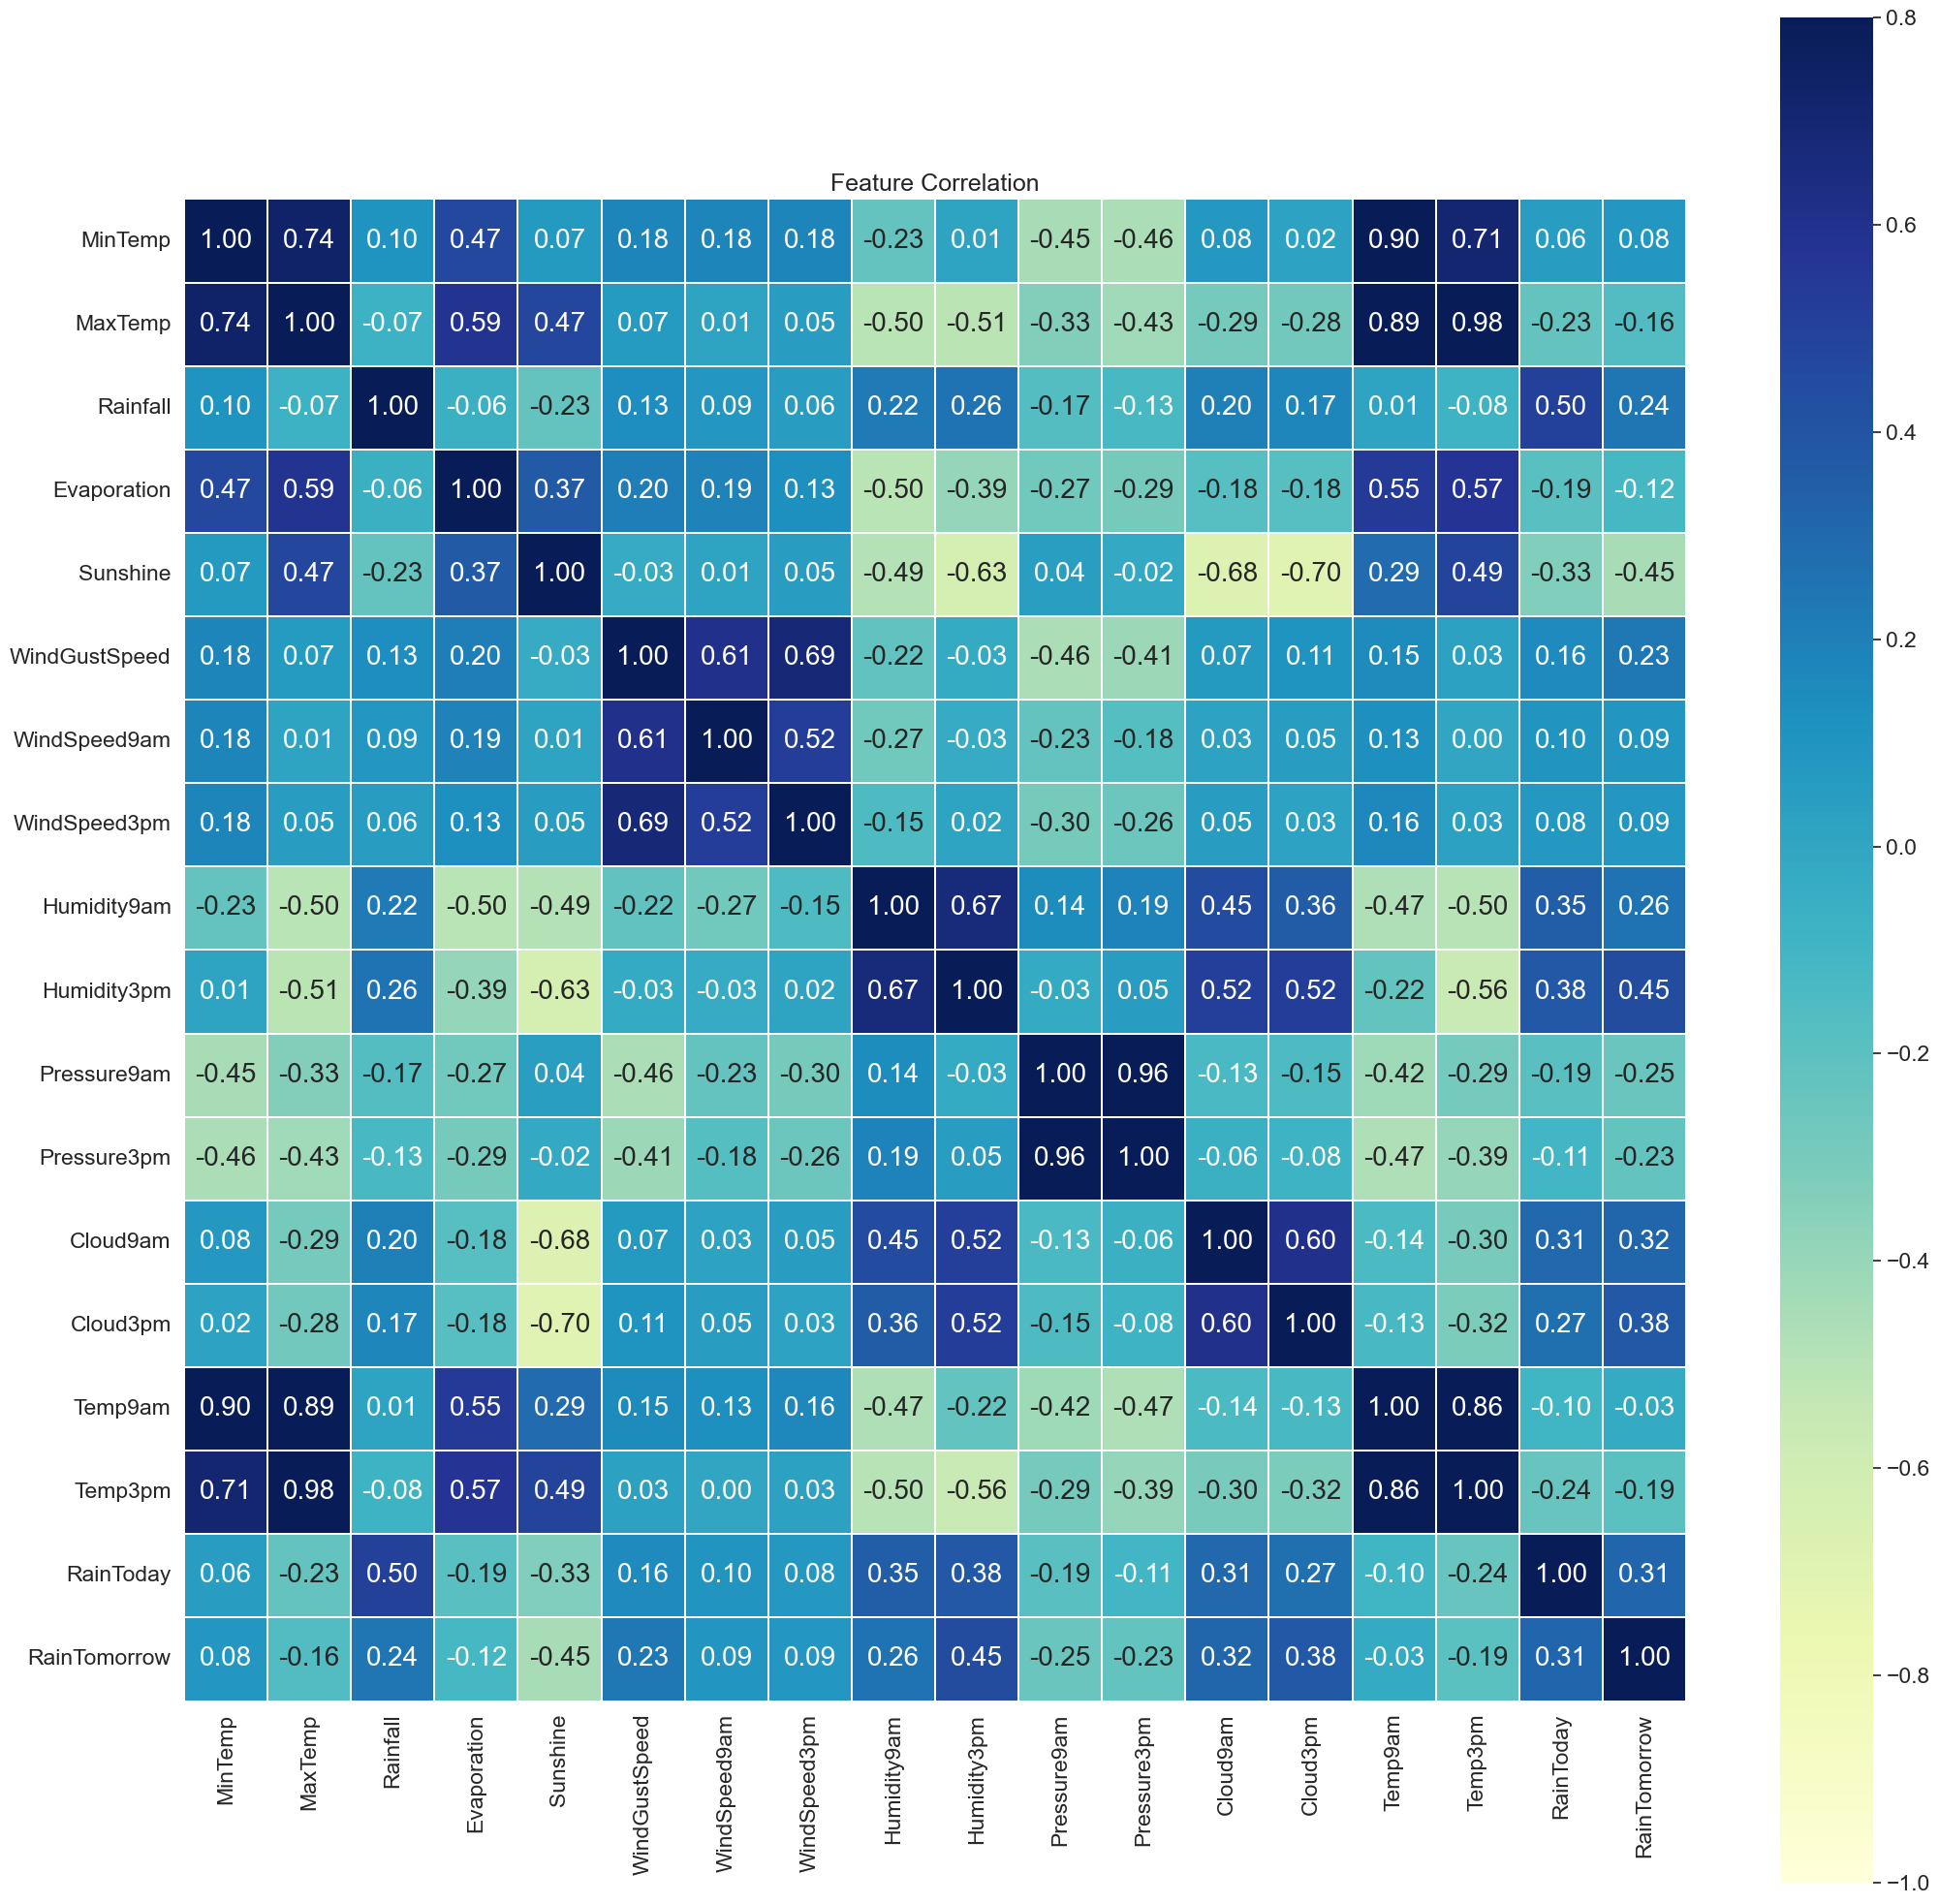

In [8]:
corr = temp_df.corr()
plt.figure(figsize = (25,25));
sns.set(font_scale=1.5);
sns.heatmap(corr,
            vmax=0.8,
            vmin=-1,
           linewidths=0.01,
           square=True,
            annot =True,
           fmt='.2f', #annot의 출력 소숫점 자리 지정
           annot_kws={"size":20},
           cmap="YlGnBu")
plt.title('Feature Correlation')
plt.show()

In [9]:
df.isnull().mean().sort_values()

Date             0.000000
Location         0.000000
MaxTemp          0.008669
MinTemp          0.010209
WindSpeed9am     0.012148
Temp9am          0.012148
Humidity9am      0.018246
WindSpeed3pm     0.021050
RainToday        0.022419
Rainfall         0.022419
RainTomorrow     0.022460
Temp3pm          0.024811
WindDir3pm       0.029066
Humidity3pm      0.030984
WindGustSpeed    0.070555
WindGustDir      0.070989
WindDir9am       0.072639
Pressure3pm      0.103314
Pressure9am      0.103568
Cloud9am         0.384216
Cloud3pm         0.408071
Evaporation      0.431665
Sunshine         0.480098
dtype: float64

In [10]:
df[cat_cols].isnull().mean().sort_values()

Date            0.000000
Location        0.000000
RainToday       0.022419
RainTomorrow    0.022460
WindDir3pm      0.029066
WindGustDir     0.070989
WindDir9am      0.072639
dtype: float64

In [11]:
num_cols = df.select_dtypes(include=np.number).columns
print(num_cols)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')


In [12]:
df[num_cols].isnull().mean().sort_values()

MaxTemp          0.008669
MinTemp          0.010209
WindSpeed9am     0.012148
Temp9am          0.012148
Humidity9am      0.018246
WindSpeed3pm     0.021050
Rainfall         0.022419
Temp3pm          0.024811
Humidity3pm      0.030984
WindGustSpeed    0.070555
Pressure3pm      0.103314
Pressure9am      0.103568
Cloud9am         0.384216
Cloud3pm         0.408071
Evaporation      0.431665
Sunshine         0.480098
dtype: float64

In [17]:
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].median())

In [20]:
for col in num_cols:
    if df[col].isnull().mean() > 0:
        col_median = df[col].median()
        df[col].fillna(col_median, inplace = True)

In [25]:
df['WindGustDir'].fillna(df['WindGustDir'].mode()[0], inplace=True)

In [29]:
cat_cols = df.select_dtypes(exclude=np.number).columns
cat_cols

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
cat_cols = cat_cols.drop('RainTomorrow')

In [27]:
for i in cat_cols:
    if df[i].isnull().mean() > 0:
        df[i].fillna(df[i].mode()[0], inplace=True)
    print(i, (df[i].isnull().mean()))

Date 0.0
Location 0.0
WindGustDir 0.0
WindDir9am 0.0
WindDir3pm 0.0
RainToday 0.0


In [32]:
file_name ='data/weatherAUS_v1.csv'
df.to_csv(file_name, index = False)

In [33]:
df.drop(['Date'], axis=1, inplace=True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [34]:
df.shape

(145460, 22)

In [37]:
df.dropna(subset=['RainTomorrow'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  object 
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  object 
 9   WindDir3pm     145460 non-null  object 
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460 non-nul

In [38]:
df = df.dropna(subset=['RainTomorrow'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   Rainfall       142193 non-null  float64
 4   Evaporation    142193 non-null  float64
 5   Sunshine       142193 non-null  float64
 6   WindGustDir    142193 non-null  object 
 7   WindGustSpeed  142193 non-null  float64
 8   WindDir9am     142193 non-null  object 
 9   WindDir3pm     142193 non-null  object 
 10  WindSpeed9am   142193 non-null  float64
 11  WindSpeed3pm   142193 non-null  float64
 12  Humidity9am    142193 non-null  float64
 13  Humidity3pm    142193 non-null  float64
 14  Pressure9am    142193 non-null  float64
 15  Pressure3pm    142193 non-null  float64
 16  Cloud9am       142193 non-null  float64
 17  Cloud3pm       142193 non-null  fl

In [39]:
file_name ='data/weatherAUS_pp_clean.csv'
df.to_csv(file_name, index = False)

In [40]:
df = pd.read_csv('data/weatherAUS_pp_clean.csv')
print(df.shape)

(142193, 22)


In [41]:
# Yes/No 값을 0, 1로 변경하기
df['RainToday'].replace({'No': 0, 'Yes': 1}, inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace = True)

In [43]:
cat_cols = df.select_dtypes(exclude=np.number).columns
cat_cols

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [45]:
df = pd.get_dummies(df, columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [46]:
X = df.drop('RainTomorrow', axis=1)  # 타겟 컬럼을 제외한 모든 컬럼이 X
y = df['RainTomorrow']

In [47]:
X.shape

(142193, 114)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y , random_state=42)

In [50]:
X_train.shape

(99535, 114)

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split

In [52]:
# 결정 트리 모델 생성 및 학습
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [53]:
# 테스트 데이터에 대해 예측
y_pred = model.predict(X_test)

In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86     32947
           1       0.54      0.53      0.53      9711

    accuracy                           0.79     42658
   macro avg       0.70      0.70      0.70     42658
weighted avg       0.79      0.79      0.79     42658



In [56]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

In [57]:
# 정확도 평가
score = accuracy_score(y_test, y_pred)
print('랜덤 포레스트(Random Forest) Accuracy :', score)

랜덤 포레스트(Random Forest) Accuracy : 0.856275493459609


In [58]:
from sklearn.metrics import classification_report
# classification_report() 결과 출력
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     33095
           1       0.78      0.50      0.61      9563

    accuracy                           0.86     42658
   macro avg       0.82      0.73      0.76     42658
weighted avg       0.85      0.86      0.84     42658

